# 1. Import Library

In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

# 2.Data Process

In [116]:
all_df = pd.read_csv("data/10.EDM_SUM_TRVL_SAMPLE_OS.csv")

In [117]:
cols=[
'SENT_RESPOND_IND',
'RK_YEAR',
'YEAR',
'Pty_Gndr_Cd',
'Pty_New_Cust_Ind',
'Pty_Cffp_Ind',
'FFP_IND',
'Ffp_Star_Carr_Ind',
'RES_LAST_REGION_CD',
'FLY_LAST_REGION_CD',
'FFP_Cr_Card_Vld_Ind',
'FLY_LAST_DAY_CNT',
'Fln_3Y_Cffp_Fln_Cnt',
'Fln_Avg_Fln_Freq_Msr',
'Tvl_3Y_Avg_Acmp_Cnt',
'Tvl_3Y_CHN_Fln_Cnt',
'Tvl_3Y_EU_Fln_Cnt',
'Tvl_3Y_HKMC_Fln_Cnt',
'Tvl_3Y_Holiday_Cnt',
'Tvl_3Y_JK_Fln_Cnt',
'Tvl_3Y_LH_Fln_Cnt',
'Tvl_3Y_NA_Fln_Cnt',
'Tvl_3Y_Pmt_Cnt',
'Tvl_3Y_SEA_Fln_Cnt',
'Tvl_3Y_SH_Fln_Cnt',
'Tvl_3Y_SWP_Fln_Cnt',
'Tvl_Avg_Pln_Day_Cnt',
'Pty_Age_Msr',
'RES_LAST_DAY_CNT',
'RES_LAST_TVL_PLN_DAY_CNT',
'Res_3Yr_Offline_Cnt',
'Res_3Yr_Online_Cnt'
]
all_df=all_df[cols]

In [118]:
all_df['Pty_Gndr_Cd'] = all_df['Pty_Gndr_Cd'].str.replace('M','1')
all_df['Pty_Gndr_Cd'] = all_df['Pty_Gndr_Cd'].str.replace('F','0')

In [119]:
all_df['Pty_Gndr_Cd'] = all_df['Pty_Gndr_Cd'].astype(int)
all_df['Pty_New_Cust_Ind'] = all_df['Pty_New_Cust_Ind'].astype(int)
all_df['Pty_Cffp_Ind'] = all_df['Pty_Cffp_Ind'].astype(int)
all_df['FFP_IND'] = all_df['FFP_IND'].astype(int)
all_df['Ffp_Star_Carr_Ind'] = all_df['Ffp_Star_Carr_Ind'].astype(int)
all_df['FFP_Cr_Card_Vld_Ind'] = all_df['FFP_Cr_Card_Vld_Ind'].astype(int)

## 2-1.Split Training and Test DataSet

In [120]:
msk = numpy.random.rand(len(all_df)) < 0.8 #len(all_df)即為資料筆數
train_df = all_df[msk]
test_df = all_df[~msk]

In [121]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1480620 train: 1184231 test: 296389


## 2-2.Get Dummies/ One-Hot-Encdoing/ Transform

In [122]:
def PreprocessData(raw_df):
    df=raw_df.drop(['RK_YEAR',
                    'YEAR',
                    'Pty_Gndr_Cd',
                    'Pty_New_Cust_Ind',
                    'Pty_Cffp_Ind',
                    'Ffp_Star_Carr_Ind',
                    'FFP_Cr_Card_Vld_Ind',
                    'Fln_3Y_Cffp_Fln_Cnt',
                    'Tvl_3Y_Avg_Acmp_Cnt',
                    'Tvl_3Y_EU_Fln_Cnt',
                    'Tvl_3Y_LH_Fln_Cnt',
                    'Tvl_3Y_NA_Fln_Cnt',
                    'Tvl_3Y_SEA_Fln_Cnt',
                    'Tvl_3Y_SH_Fln_Cnt',
                    'Pty_Age_Msr',
                    'Res_3Yr_Offline_Cnt',
                    'Tvl_3Y_CHN_Fln_Cnt',
                    'Tvl_3Y_EU_Fln_Cnt',
                    'Tvl_3Y_HKMC_Fln_Cnt',
                    'Tvl_3Y_JK_Fln_Cnt',
                    'Tvl_3Y_LH_Fln_Cnt',
                    'Tvl_3Y_NA_Fln_Cnt',
                    'Tvl_3Y_SEA_Fln_Cnt',
                    'Tvl_3Y_SH_Fln_Cnt',
                    'Tvl_3Y_SWP_Fln_Cnt'
                   ],axis=1)
    x_OneHot_df = pd.get_dummies(data=df,columns=['RES_LAST_REGION_CD','FLY_LAST_REGION_CD'])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [123]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [124]:
train_Features.shape

(1184231, 26)

In [125]:
test_Features.shape

(296389, 26)

# 3. Create Model 

In [ ]:
# 調整隱藏神經元數準則
# https://stackoverflow.com/questions/59176595/validation-accuracy-fluctuating-while-training-accuracy-increase

In [90]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers

In [126]:
model = Sequential()

In [127]:
model.add(Dense(units=5, #隱藏層為20
                input_dim=2, #輸入層的神經元有28個
                kernel_initializer='uniform', 
                activation='relu'))

In [128]:
model.add(Dropout(0.5))

In [129]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [52]:
#model.add(Dense(units=30, 
                #kernel_initializer='uniform', 
                #activation='relu'))

In [53]:
#model.add(Dropout(0.5))

In [130]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 5)                 135       
_________________________________________________________________
dropout_8 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None


# 4. Train model

In [ ]:
# Optimizer Setting
# https://keras.io/zh/optimizers/

In [131]:
sgd = optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)

In [132]:
model.compile(loss='binary_crossentropy', 
              #optimizer='adam',
              optimizer='SGD',
              metrics=['accuracy'])

In [133]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=100, #多少個樣本疊代一次
                         verbose=2)

Train on 947384 samples, validate on 236847 samples
Epoch 1/60
 - 14s - loss: 0.6525 - acc: 0.6381 - val_loss: 0.9002 - val_acc: 0.1316
Epoch 2/60
 - 13s - loss: 0.6098 - acc: 0.6840 - val_loss: 0.8211 - val_acc: 0.3111
Epoch 3/60
 - 15s - loss: 0.5802 - acc: 0.6960 - val_loss: 0.7655 - val_acc: 0.4212
Epoch 4/60
 - 14s - loss: 0.5604 - acc: 0.7009 - val_loss: 0.7365 - val_acc: 0.4835
Epoch 5/60
 - 13s - loss: 0.5442 - acc: 0.7150 - val_loss: 0.7177 - val_acc: 0.5236
Epoch 6/60
 - 12s - loss: 0.5287 - acc: 0.7340 - val_loss: 0.7009 - val_acc: 0.5582
Epoch 7/60
 - 13s - loss: 0.5178 - acc: 0.7401 - val_loss: 0.6778 - val_acc: 0.5930
Epoch 8/60
 - 12s - loss: 0.5114 - acc: 0.7437 - val_loss: 0.6718 - val_acc: 0.6060
Epoch 9/60
 - 12s - loss: 0.5062 - acc: 0.7462 - val_loss: 0.7097 - val_acc: 0.5881
Epoch 10/60
 - 12s - loss: 0.5038 - acc: 0.7466 - val_loss: 0.7064 - val_acc: 0.5960
Epoch 11/60
 - 12s - loss: 0.5017 - acc: 0.7472 - val_loss: 0.6567 - val_acc: 0.6360
Epoch 12/60
 - 13s - l

# 5. Print History

In [134]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

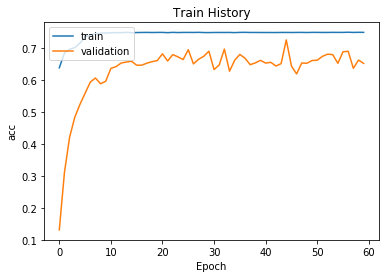

In [135]:
show_train_history(train_history,'acc','val_acc')

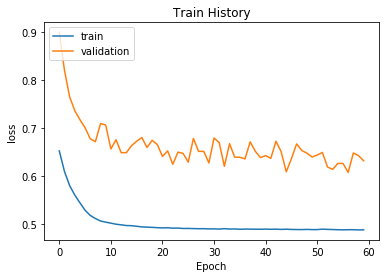

In [136]:
show_train_history(train_history,'loss','val_loss')

# 6.Model Evaluation and Accuracy

In [137]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

296389/296389 [==============================] - 5s 16us/step


In [138]:
scores[1]

0.7635101167722149

# 7.Build Confusion Matrix

In [34]:
all_features,Label = PreprocessData(all_df)

In [35]:
all_features.shape

(1480620, 30)

In [36]:
all_features[:2]

array([[1.        , 0.00219298, 0.15924092, 0.        , 0.08571429,
        0.        , 0.        , 0.00442589, 0.67105263, 0.0960961 ,
        0.09281437, 0.06      , 0.01886792, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.0372807 , 0.90717822, 0.        , 0.        ,
        0.        , 0.13333333, 0.00110022, 0.75      , 0.10510511,
        0.04191617, 0.04      , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ]])

In [37]:
all_prediction=model.predict_classes(all_features)
all_probability = model.predict(all_features)

In [38]:
Label[:2]

array([0., 0.])

In [39]:
pd.crosstab(Label,all_prediction.reshape(-1),
            rownames=['label'],colnames=['predict'])

predict,0,1
label,,
0.0,611927,128383
1.0,163935,576375


In [40]:
result=all_df #先把原始資料集喚回

In [41]:
result.insert(2, #插入位置
          'probability',all_probability) #再把剛剛兩個欄位名稱/欄位數值加入

In [42]:
result.insert(3, #插入位置
          'Predict',all_prediction) #再把剛剛兩個欄位名稱/欄位數值加入

In [43]:
result[:2]

,SENT_RESPOND_IND,RK_YEAR,probability,Predict,YEAR,Pty_Gndr_Cd,Pty_New_Cust_Ind,Pty_Cffp_Ind,FFP_IND,Ffp_Star_Carr_Ind,...,Tvl_3Y_Pmt_Cnt,Tvl_3Y_SEA_Fln_Cnt,Tvl_3Y_SH_Fln_Cnt,Tvl_3Y_SWP_Fln_Cnt,Tvl_Avg_Pln_Day_Cnt,Pty_Age_Msr,RES_LAST_DAY_CNT,RES_LAST_TVL_PLN_DAY_CNT,Res_3Yr_Offline_Cnt,Res_3Yr_Online_Cnt
0,0,1000000_2017,0.316801,0,2017,1,0,0,1,0,...,0,0,8,0,45.25,55,33,31,3,1
1,0,1000004_2017,0.000923,0,2017,0,0,0,1,0,...,0,0,4,0,12.00,61,36,14,2,0


In [44]:
UnderEstimate = [(result['SENT_RESPOND_IND']==1) 
                 & (result['Predict']==0)]

# 8.Export to CSV

In [45]:
export_csv = result.to_csv (r'C:\Users\F78001\Desktop\Result.csv', index = None, header=True)
#Don't forget to add '.csv' at the end of the path